In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df['overweight'] = (df['weight'] / ((df['height']/100)**2)).apply(lambda x: 1 if x > 25 else 0)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x>1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x>1 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [5]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


## COUNT PLOT

<Axes: xlabel='variable,value'>

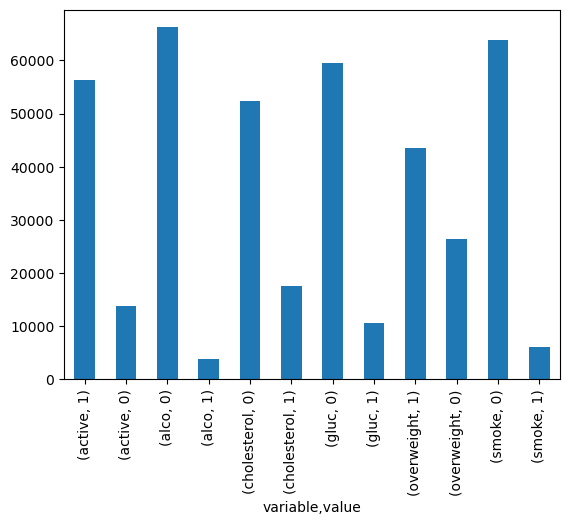

In [18]:
df_cat.groupby('variable')['value'].value_counts().plot.bar()

<Axes: xlabel='variable', ylabel='count'>

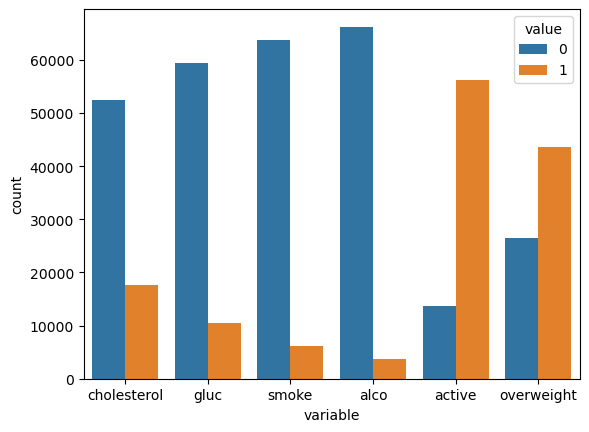

In [21]:
sns.countplot(x='variable', data=df_cat, hue='value')

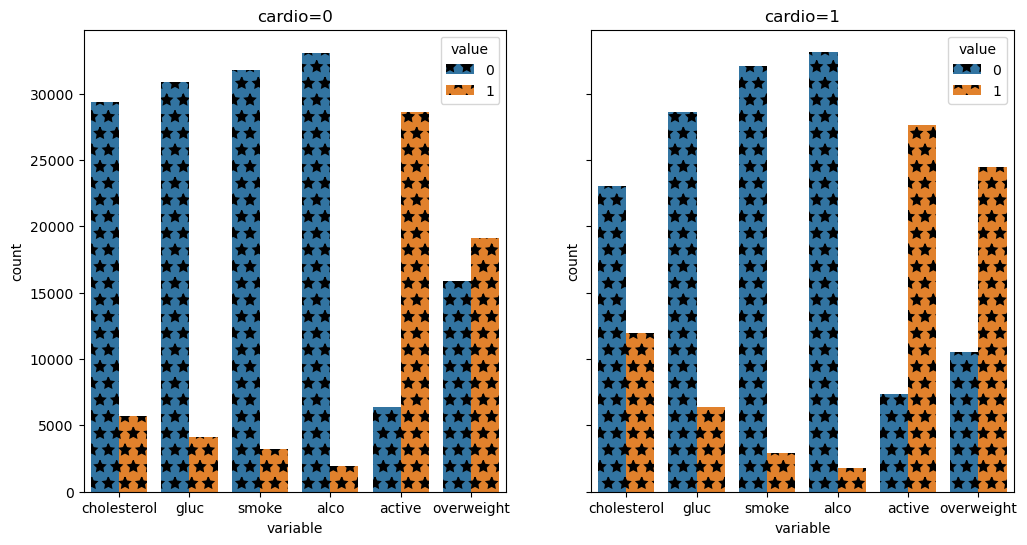

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for i, (name, group) in enumerate(df_cat.groupby('cardio')):
    ax[i].set_title(f'cardio={name}')
    ax[i].set_ylabel("total")
    sns.countplot(x='variable', data=group, hue='value', hatch='*', ax=ax[i])

## BAR PLOT

<Axes: xlabel='variable', ylabel='value'>

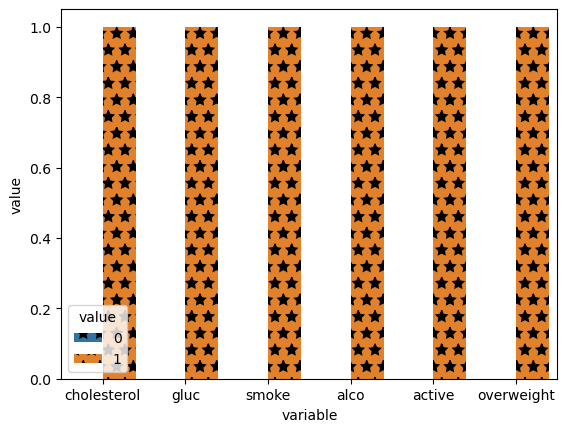

In [58]:
sns.barplot(x='variable', data=group, y='value', hue='value', hatch='*')